In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


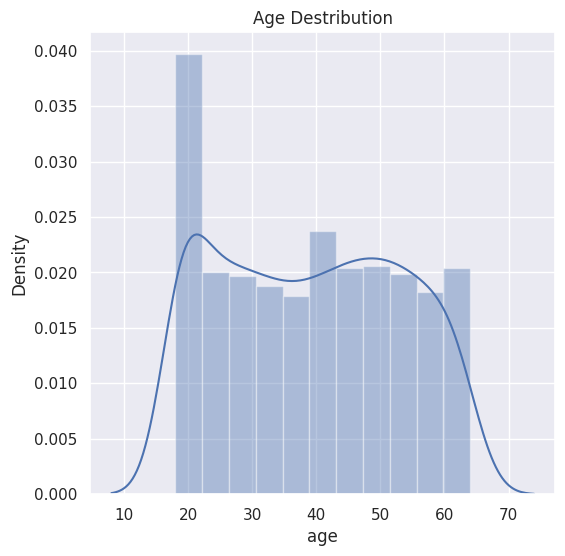

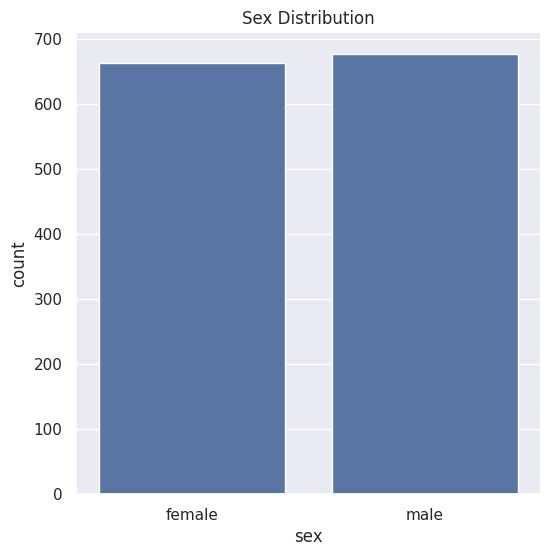

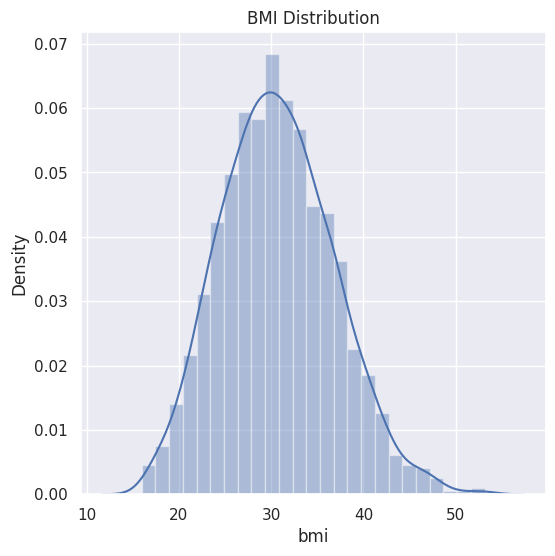

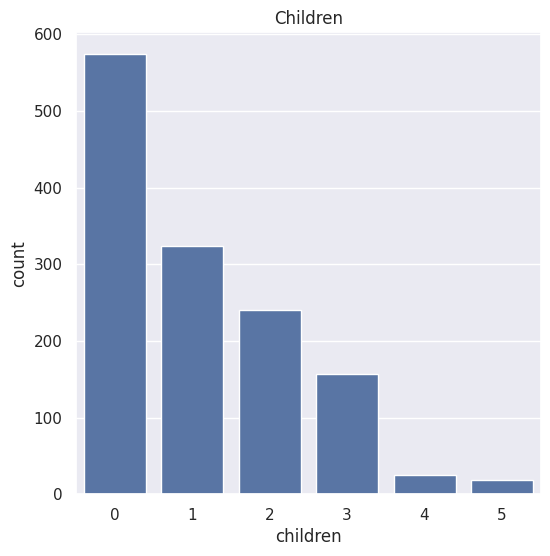

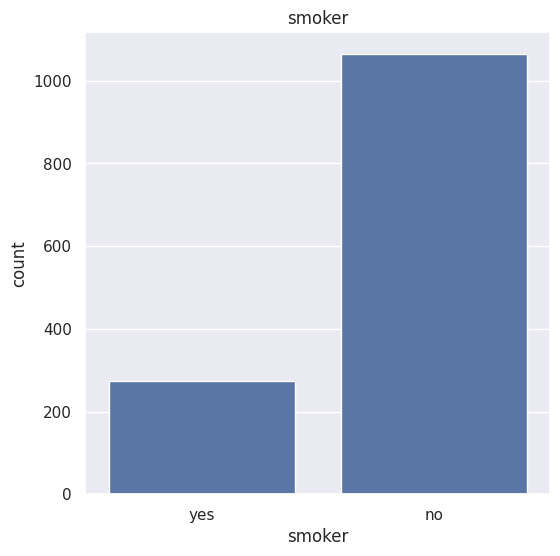

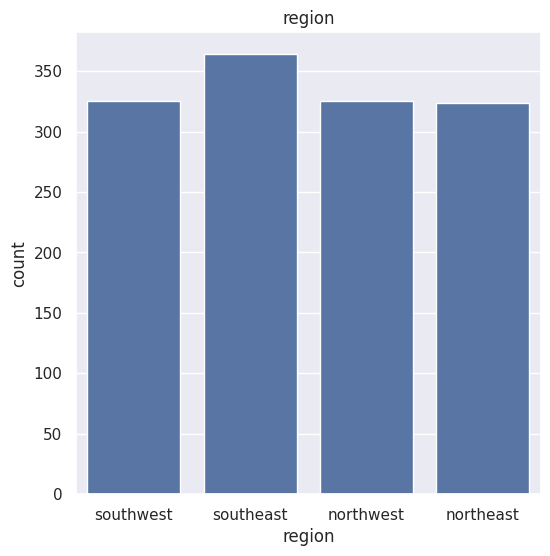

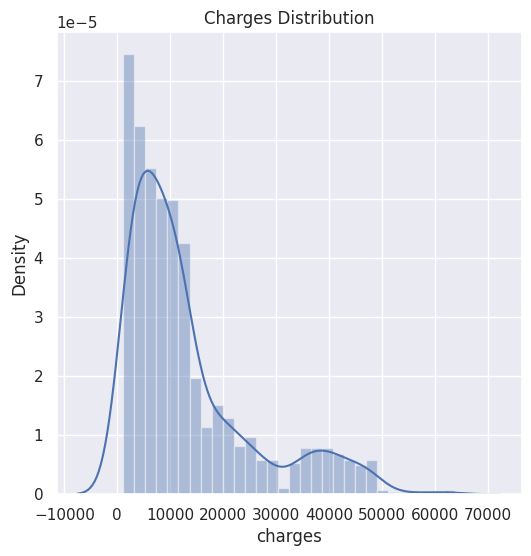

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64
(1338, 6) (1070, 6) (268, 6)
R squared vale :  0.751505643411174
R squared vale :  0.7447273869684076
[3760.0805765]
The in

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COST insurence/insurance.csv')
df.head()
df.shape
df.isnull().sum()
df.describe()
df.info()
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Destribution')
plt.show()
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()
df['sex'].value_counts()
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()
df['children'].value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()
df['smoker'].value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()
df['region'].value_counts()
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()
# encoding sex column
df.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)
X =df.drop(columns='charges', axis=1)
Y = df['charges']
print(X)
print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
training_data_prediction =regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)
test_data_prediction =regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

In [ ]:


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COST insurence/insurance.csv')

# Coding of categorical variables
df.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
df.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)
df.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

# Features and target variable
X = df.drop(columns='charges', axis=1)
Y = df['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#1. Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, Y_train)

# Prediction
training_data_prediction_lr = linear_regressor.predict(X_train_scaled)
r2_train_lr = r2_score(Y_train, training_data_prediction_lr)
print('R squared for training data (Linear Regression): ', r2_train_lr)

test_data_prediction_lr = linear_regressor.predict(X_test_scaled)
r2_test_lr = r2_score(Y_test, test_data_prediction_lr)
print('R squared for test data (Linear Regression): ', r2_test_lr)

# 2. Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, Y_train)

# Prediction
training_data_prediction_rf = rf_regressor.predict(X_train_scaled)
r2_train_rf = r2_score(Y_train, training_data_prediction_rf)
print('R squared for training data (Random Forest): ', r2_train_rf)

test_data_prediction_rf = rf_regressor.predict(X_test_scaled)
r2_test_rf = r2_score(Y_test, test_data_prediction_rf)
print('R squared for test data (Random Forest): ', r2_test_rf)

# 3. GridSearchCV to Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, Y_train)

print("Best parameters for Random Forest:", grid_search.best_params_)

# best model
best_rf_regressor = grid_search.best_estimator_


training_data_prediction_rf_best = best_rf_regressor.predict(X_train_scaled)
r2_train_rf_best = r2_score(Y_train, training_data_prediction_rf_best)
print('R squared for training data (Tuned Random Forest): ', r2_train_rf_best)

test_data_prediction_rf_best = best_rf_regressor.predict(X_test_scaled)
r2_test_rf_best = r2_score(Y_test, test_data_prediction_rf_best)
print('R squared for test data (Tuned Random Forest): ', r2_test_rf_best)

#4. Prediction for new inputs
input_data = (31, 1, 25.74, 0, 1, 0)
input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)
input_data_scaled = scaler.transform(input_data_as_numpy_array)


prediction_lr = linear_regressor.predict(input_data_scaled)
print('Predicted insurance cost using Linear Regression: USD', prediction_lr[0])

prediction_rf = rf_regressor.predict(input_data_scaled)
print('Predicted insurance cost using Random Forest: USD', prediction_rf[0])

prediction_rf_best = best_rf_regressor.predict(input_data_scaled)
print('Predicted insurance cost using Tuned Random Forest: USD', prediction_rf_best[0])



R squared for training data (Linear Regression):  0.7413131194887537
R squared for test data (Linear Regression):  0.783021587162344
R squared for training data (Random Forest):  0.9744071364920427
R squared for test data (Random Forest):  0.8676392879534185
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
R squared for training data (Tuned Random Forest):  0.9098534769578319
R squared for test data (Tuned Random Forest):  0.8777739486097205
Predicted insurance cost using Linear Regression: USD 4016.9926699873213
Predicted insurance cost using Random Forest: USD 3778.7441690000055
Predicted insurance cost using Tuned Random Forest: USD 4119.624562825879


Linear Regression - RMSE (train): 6110.42
Linear Regression - RMSE (test): 5803.93


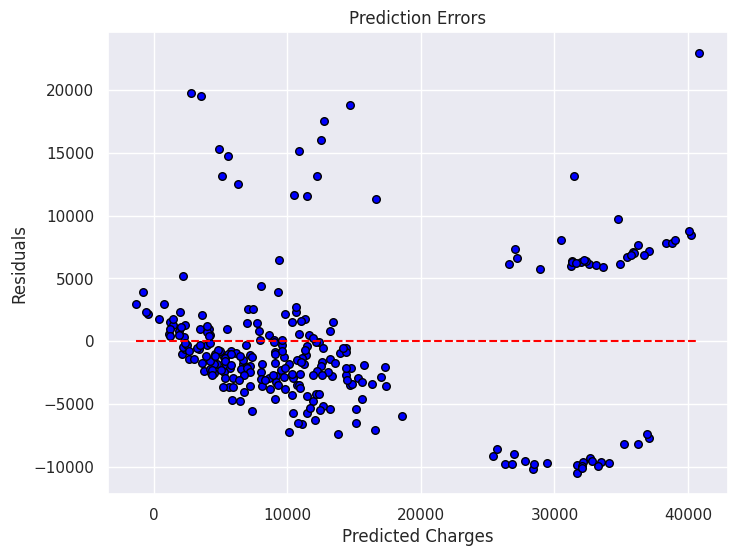

Random Forest - RMSE (train): 1922.44
Random Forest - RMSE (test): 4532.53


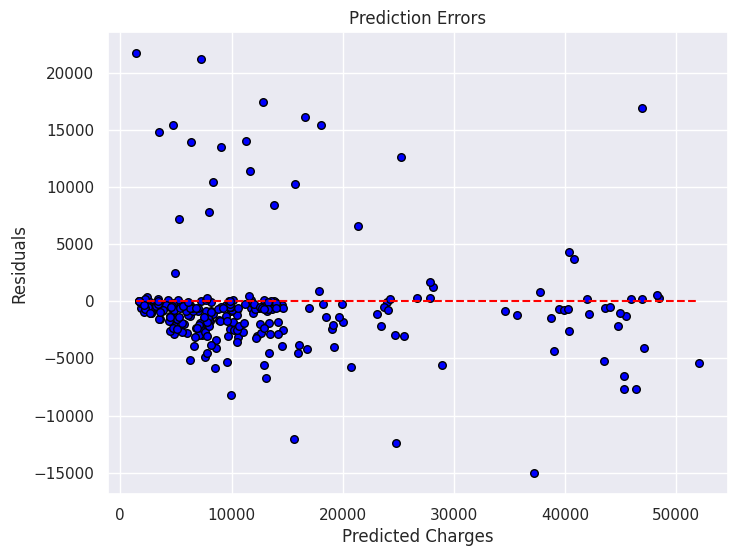

Tuned Random Forest - RMSE (train): 3607.10
Tuned Random Forest - RMSE (test): 4356.08


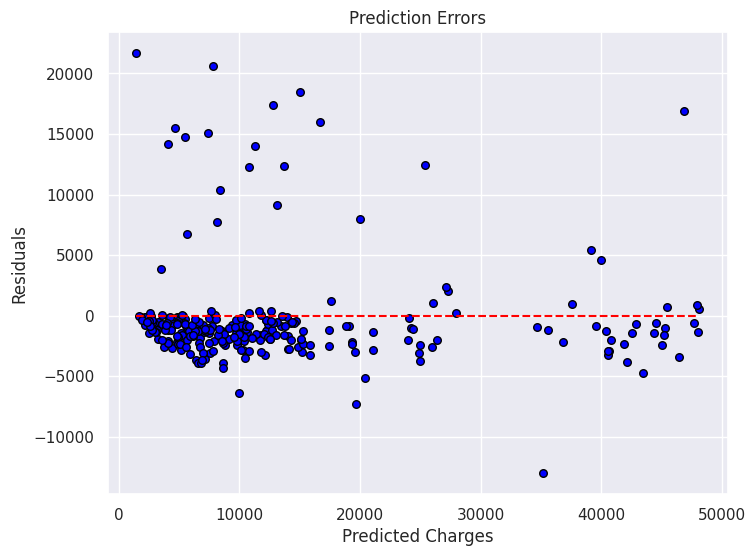

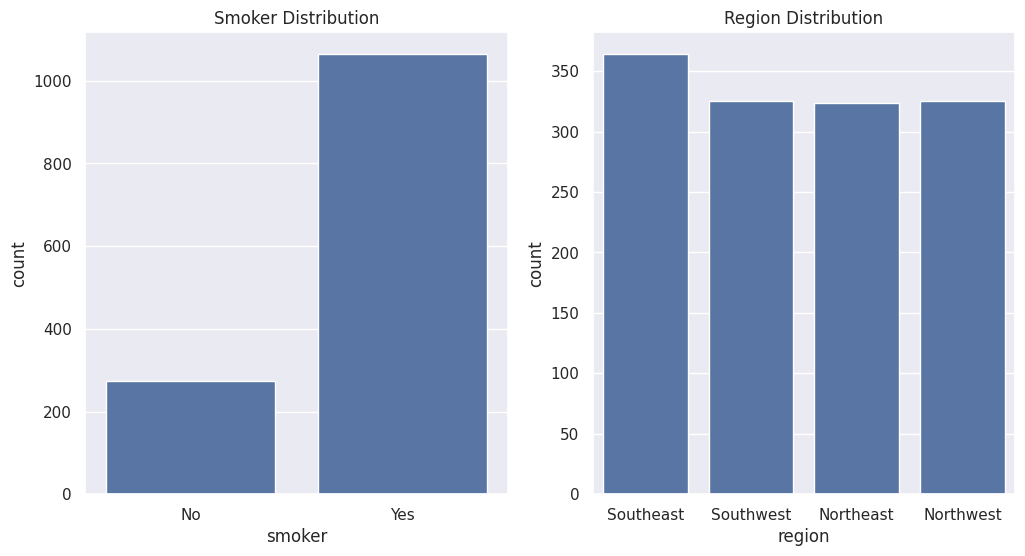

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
region     -0.056993
sex        -0.057292
smoker     -0.787251
Name: charges, dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# RMSE model
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


def plot_error(predictions, true_values):
    plt.figure(figsize=(8, 6))
    plt.scatter(predictions, true_values - predictions, color='blue', edgecolor='black', s=30)
    plt.hlines(y=0, xmin=min(predictions), xmax=max(predictions), color='red', linestyle='--')
    plt.title('Prediction Errors')
    plt.xlabel('Predicted Charges')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/COST insurence/insurance.csv')


df.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
df.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)
df.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

# Features and target variable
X = df.drop(columns='charges', axis=1)
Y = df['charges']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, Y_train)


training_data_prediction_lr = linear_regressor.predict(X_train_scaled)
test_data_prediction_lr = linear_regressor.predict(X_test_scaled)


rmse_train_lr = rmse(Y_train, training_data_prediction_lr)
rmse_test_lr = rmse(Y_test, test_data_prediction_lr)

print(f"Linear Regression - RMSE (train): {rmse_train_lr:.2f}")
print(f"Linear Regression - RMSE (test): {rmse_test_lr:.2f}")


plot_error(test_data_prediction_lr, Y_test)

# 2. Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, Y_train)

training_data_prediction_rf = rf_regressor.predict(X_train_scaled)
test_data_prediction_rf = rf_regressor.predict(X_test_scaled)

rmse_train_rf = rmse(Y_train, training_data_prediction_rf)
rmse_test_rf = rmse(Y_test, test_data_prediction_rf)

print(f"Random Forest - RMSE (train): {rmse_train_rf:.2f}")
print(f"Random Forest - RMSE (test): {rmse_test_rf:.2f}")

plot_error(test_data_prediction_rf, Y_test)

# 3. Tuned Random Forest
best_rf_regressor = grid_search.best_estimator_

training_data_prediction_rf_best = best_rf_regressor.predict(X_train_scaled)
test_data_prediction_rf_best = best_rf_regressor.predict(X_test_scaled)

rmse_train_rf_best = rmse(Y_train, training_data_prediction_rf_best)
rmse_test_rf_best = rmse(Y_test, test_data_prediction_rf_best)

print(f"Tuned Random Forest - RMSE (train): {rmse_train_rf_best:.2f}")
print(f"Tuned Random Forest - RMSE (test): {rmse_test_rf_best:.2f}")

plot_error(test_data_prediction_rf_best, Y_test)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x='smoker', data=df, ax=axs[0])
axs[0].set_title('Smoker Distribution')
axs[0].set_xticklabels(['No', 'Yes'])

sns.countplot(x='region', data=df, ax=axs[1])
axs[1].set_title('Region Distribution')
axs[1].set_xticklabels(['Southeast', 'Southwest', 'Northeast', 'Northwest'])

plt.show()

correlation_matrix = df.corr()
print(correlation_matrix['charges'].sort_values(ascending=False))

